<a href="https://colab.research.google.com/github/watersavvy/CV_Projects/blob/main/AK_LS_DS_Unit_4_Sprint_Challenge_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Major Neural Network Architectures Challenge
## *Data Science Sprint 15 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Deep Learning. This week we studied several famous neural network architectures:
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy.

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

__*GridSearch:*__ CodeGrade will likely break if it is asked to run a gridsearch for a deep learning model (CodeGrade instances run on a single processor). So while you may choose to run a gridsearch locally to find the optimum hyper-parameter values for your model, **please delete (or comment out) the gridsearch code and simply instantiate a model with the optimum parameter values to get the performance that you want out of your model prior to submission.**


## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection

____

# (CodeGrade) Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu.

3) If you have gridsearch code, now is when you either delete it or comment out that code so CodeGrade doesn't run it and crash.

4) Read the directions in **Part 2** of this notebook for specific instructions on how to prep that section for CodeGrade.

____

<a id="p1"></a>
## Part 1 - LSTMs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model.

Your Tasks:
- Use Keras to fit a predictive model, classifying news articles into topics.
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric
- Report your overall score and accuracy
- Due to resource concerns on CodeGrade, `set your model's epochs=1`

For reference, the LSTM code we used in class will be useful.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [ ]:
# Import data (don't alter the code in this cell)
from tensorflow.keras.datasets import reuters

# Suppress some warnings from deprecated reuters.load_data
import warnings
warnings.filterwarnings('ignore')

# Load data
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# Due to limited computational resources on CodeGrade, take the following subsample
train_size = 1000
X_train = X_train[:train_size]
y_train = y_train[:train_size]

2110848/2110848 [==============================] - 1s 1us/step


In [ ]:
# Demo of encoding
word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

550378/550378 [==============================] - 1s 1us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [ ]:
# Imports (don't alter this code)
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# DO NOT CHANGE THESE VALUES
# Keras docs say that the + 1 is needed: https://keras.io/api/layers/core_layers/embedding/
MAX_FEATURES = len(word_index.values()) + 1

# maxlen is the length of each sequence (i.e. document length)
MAXLEN = 200

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1000,)
(1000,)


In [ ]:
# Pre-process your data by creating sequences
# Save your transformed data to the same variable name:
# example: X_train = some_transformation(X_train)

X_train = sequence.pad_sequences(X_train, MAXLEN)
X_test = sequence.pad_sequences(X_test, MAXLEN)

print(X_train.shape)
print(X_test.shape)

#raise NotImplementedError()

(1000, 200)
(2246, 200)


In [ ]:
# Visible tests
assert X_train.shape[1] == MAXLEN, "Your train input sequences are the wrong length. Did you use the sequence import?"
assert X_test.shape[1] == MAXLEN, "Your test input sequences are the wrong length. Did you use the sequence import?"

### Create your model

Make sure to follow these instructions (also listed above):
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric

**Additional considerations**

The number of nodes in your output layer should be equal to the number of **unique** values in the sequences you are training and testing on. For this text, that value is equal to 46.

- Set the number of nodes in your output layer equal to 46

In [ ]:
# Build and complie your model here

#%%time

## Takes about 4.5 minutes to train the entire corpus for 50 epochs on a colab GPU (1 LSTM layer, 128 neurons)

# build a 1 layer LSTM language model
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

top_words = 200000
embedding_vector_length = 46

model = Sequential()

# embedding layer
model.add(Embedding(top_words, embedding_vector_length, input_length=MAXLEN))

# hidden layer 1
model.add(LSTM(100,
               return_sequences=False)) # whenever using 2 or more LSTM layers,
                                        # set return_sequences= True for all but the last LSTM layer

# this is our output layer
# recall that n_features = number of characters in the dictionary = ??
model.add(Dense(46, activation='softmax'))

# notice that we are using sparse_categorical_crossentropy this time around - why?
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
              )



#raise NotImplementedError()

In [ ]:
# Visible Test
assert model.get_config()["layers"][1]["class_name"] == "Embedding", "Layer 1 should be an Embedding layer."

In [ ]:
# Hidden Test

### Fit your model

Now, fit the model that you built and compiled in the previous cells. Remember to set your `epochs=1`!

In [ ]:
#print(model.summary())

In [ ]:
# Fit your model here
# REMEMBER to set epochs=1

model.fit(X_train, y_train, epochs=1, batch_size=32)

#raise NotImplementedError()

32/32 [==============================] - 15s 237ms/step - loss: 3.0243 - accuracy: 0.3120


In [ ]:
# Visible Test
n_epochs = len(model.history.history["loss"])
assert n_epochs == 1, "Verify that you set epochs to 1."

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

### Reading in the images

The code in the following cell will download the images to your notebook (either in your local Jupyter notebook or in Google colab).

**Note**: In order to properly run this notebook in Codegrade, you must comment out

`data = urllib.request.urlopen(text_file)`

after running the cell in your environment.

In [ ]:
# Prep to import images (don't alter the code in this cell)
import urllib.request

# Text file of image URLs
text_file = "https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_image_url.txt"
# data = urllib.request.urlopen(text_file)

# Create list of image URLs
url_list = []
for line in data:
    url_list.append(line.decode('utf-8'))

In [ ]:
# Import images (don't alter the code in this cell)

from skimage.io import imread
from skimage.transform import resize

# instantiate list to hold images
image_list = []

### UNCOMMENT THE FOLLOWING CODE TO LOAD YOUR IMAGES

# loop through URLs and load each image
# for url in url_list:
    # image_list.append(imread(url))

## UNCOMMENT THE FOLLOWING CODE TO VIEW AN EXAMPLE IMAGE SIZE
# What is an "image"?
print(type(image_list[0]), end="\n\n")

print("Each of the Images is a Different Size")
print(image_list[0].shape)
print(image_list[1].shape)

<class 'numpy.ndarray'>

Each of the Images is a Different Size
(2137, 1710, 3)
(3810, 2856, 3)


### Run ResNet50v2

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. You can print out or view the predictions in any way you see fit. In order to receive credit, you need to have made predictions at some point in the following cells.

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

**Autograded tasks**

* Instantiate your ResNet 50v2 and save to a variable named `resnet_model`

**Other tasks**
* Re-size your images
* Use `resnet_model` to predict if each image contains a frog
* Decode your predictions
* Hint: the lesson on CNNs will have some helpful code

**Stretch goals***
* Check for other things such as fish
* Print out the image with its predicted label
* Wrap everything nicely in well documented functions

## Important note!

To increase the chances that your notebook will run in CodeGrade, when you **submit** your notebook:

* comment out the code where you load the images
* comment out the code where you make the predictions
* comment out any plots or image displays you create

**MAKE SURE YOUR NOTEBOOK RUNS COMPLETELY BEFORE YOU SUBMIT!**

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.applications.resnet_v2 import ResNet50V2 # <-- pre-trained model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions

resnet_model = tf.keras.applications.ResNet50V2()

102869336/102869336 [==============================] - 6s 0us/step


In [ ]:
# Code from the CNN lecture applied!

def process_img_path(img_path):
    """
    Using tensorflow per-build image processor.

    Returns processed image.
    """
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
    return image.load_img(img_path, target_size=(224, 224))

# Decide whether any of the three most likely image classes is "frog"
def img_contains_frog(img):
    """
    Imputs image into resnet50 pre-trained model and returns the top 3 likely labels for the image (ranked by largest probability)
    """
    # preprocess image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print('x.shape after preprocess_input ',x.shape)

    # instantiate pretrained ResNet50 model
    frog_model = ResNet50V2(weights='imagenet')

    # get classification of image
    # features = frog_model.predict(x)
    print('shape of predictions ',features.shape)

    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions
    results = decode_predictions(features, top=3)[0]

    # return True if 'frog' is among the top 3 predictions
    # detected_frog != ('bullfrog', 'tree_frog', 'tailed_frog')
    detected_frog = False
    for entry in results:
        print(entry)
        # if entry[1] == 'frog':
        if entry[1] == 'bullfrog' or entry[1] == 'tree_frog' or entry[1] == 'tailed frog':
            detected_frog = True
    return detected_frog
#raise NotImplementedError()

In [ ]:
### HIDDEN TESTS
assert resnet_model.get_config()["name"] == "resnet50v2", "Did you instantiate the resnet model?"

In [ ]:
import requests

# links to two images that we'll use with our pre-trained model
image_urls = ["https://i.imgur.com/UJSF1ez.jpeg",
              "https://i.imgur.com/dJMC97k.jpeg"]

# for _id,img in enumerate(image_urls):
    # r = requests.get(img)
    # with open(f'example{_id}.jpg', 'wb') as f:
        # f.write(r.content)

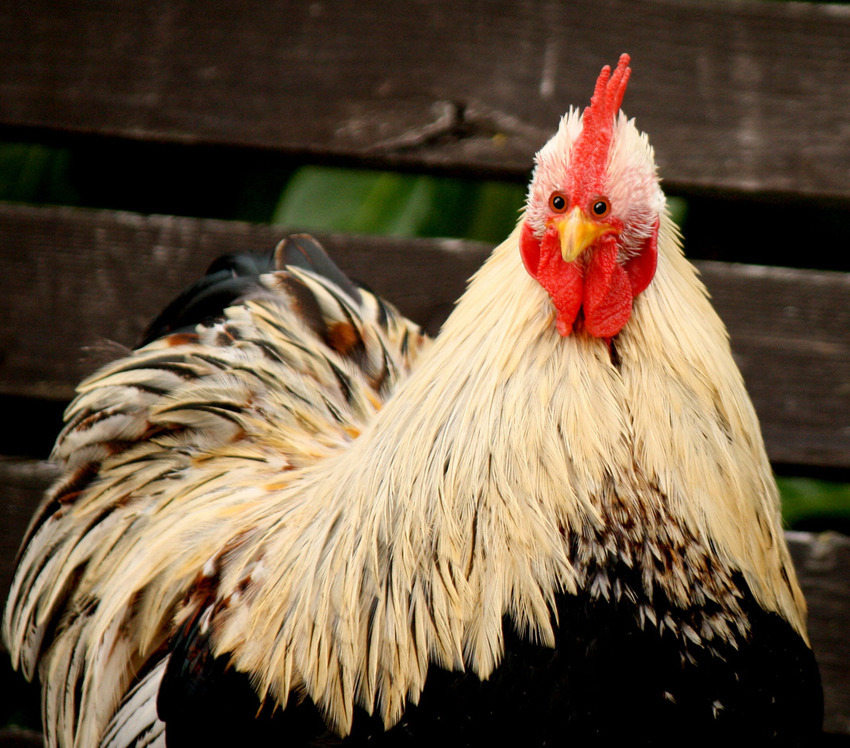

In [ ]:
# from IPython.display import Image
# Image(filename='./example0.jpg', width=600)

In [ ]:
# processed_image = process_img_path('example0.jpg')

# img_contains_frog(processed_image)

x.shape after preprocess_input  (1, 224, 224, 3)
1/1 [==============================] - 1s 805ms/step
shape of predictions  (1, 1000)
35363/35363 [==============================] - 0s 0us/step
('n01514668', 'cock', 0.9975802)
('n01514859', 'hen', 0.0024192214)
('n02906734', 'broom', 1.7359496e-07)


False

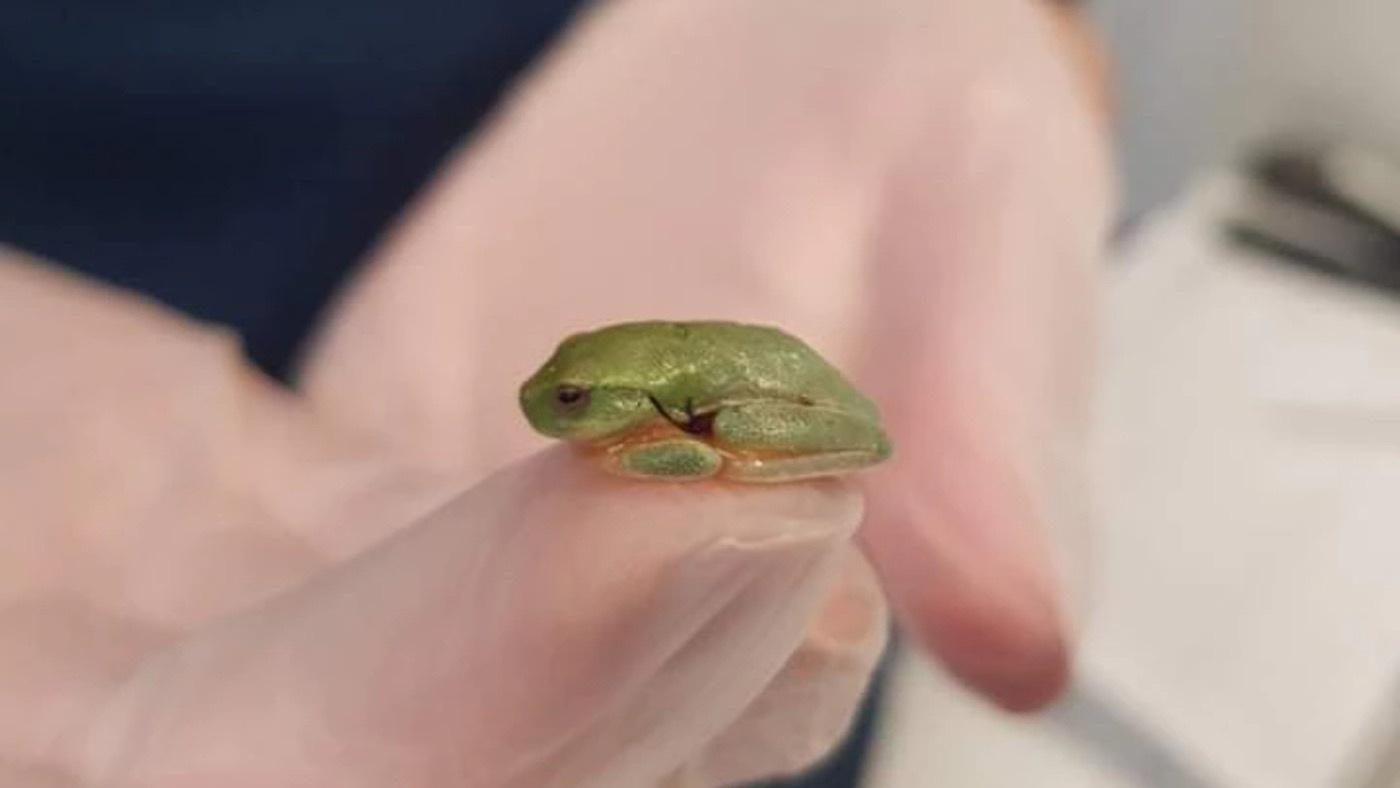

In [ ]:
# from IPython.display import Image
# Image(filename='./example1.jpg', width=600)

In [ ]:
# processed_image = process_img_path('example1.jpg')

# img_contains_frog(processed_image)

x.shape after preprocess_input  (1, 224, 224, 3)


1/1 [==============================] - 1s 826ms/step
shape of predictions  (1, 1000)
('n01682714', 'American_chameleon', 0.40150386)
('n01693334', 'green_lizard', 0.32355285)
('n01644373', 'tree_frog', 0.15986507)


True

## Congratulations!

Thank you for your hard work, and [congratulations](https://giphy.com/embed/26xivLqkv86uJzqWk)!!! You've learned a lot, and you should proudly call yourself a Data Scientist.
